In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load final dataset
df = pd.read_csv("station_suitability_scores.csv")

print("Shape:", df.shape)
print(df.columns)
df.head()


: 

In [ ]:
# Drop non-essential columns and non-numeric columns
data = df.drop(columns=['station_name', 'station_key'])

# Continuous target for regression
y_reg = data['suitability_score']

# Create categorical target for classification
y_class = pd.qcut(data['suitability_score'], q=3, labels=['Low', 'Medium', 'High'])

# Drop target columns from features and keep only numeric columns
X = data.drop(columns=['suitability_score'])
X = X.select_dtypes(include=['number'])

print("Feature columns:", X.columns.tolist())
print("Target (regression):", y_reg.shape)
print("Target (classification):", y_class.value_counts())

Feature columns: ['energy_consumed_kwh_sum', 'energy_consumed_kwh_mean', 'charging_duration_hours_mean', 'charging_rate_kw_mean', 'sessions_count', 'latitude', 'longitude', 'stations_within_2km', 'energy_consumed_kwh', 'charging_duration_hours', 'state_of_charge_start_', 'state_of_charge_end_', 'avg_soc_delta', 'weekend_share', 'sessions_count_norm', 'energy_consumed_kwh_mean_norm', 'charging_duration_hours_mean_norm', 'avg_soc_delta_norm', 'weekend_share_norm', 'stations_within_2km_norm']
Target (regression): (154,)
Target (classification): suitability_score
Medium    52
Low       51
High      51
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train_reg)

# Predict & evaluate
y_pred_reg = rf_reg.predict(X_test)
import numpy as np
print("Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("Regression R²:", r2_score(y_test_reg, y_pred_reg))

Regression RMSE: 0.03792059329232469
Regression R²: 0.7268138674378356


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_class)

# Predict & evaluate
y_pred_class = rf_clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Classification Accuracy: 0.5483870967741935

Classification Report:
               precision    recall  f1-score   support

        High       0.67      0.75      0.71         8
         Low       0.55      0.60      0.57        10
      Medium       0.45      0.38      0.42        13

    accuracy                           0.55        31
   macro avg       0.56      0.58      0.56        31
weighted avg       0.54      0.55      0.54        31



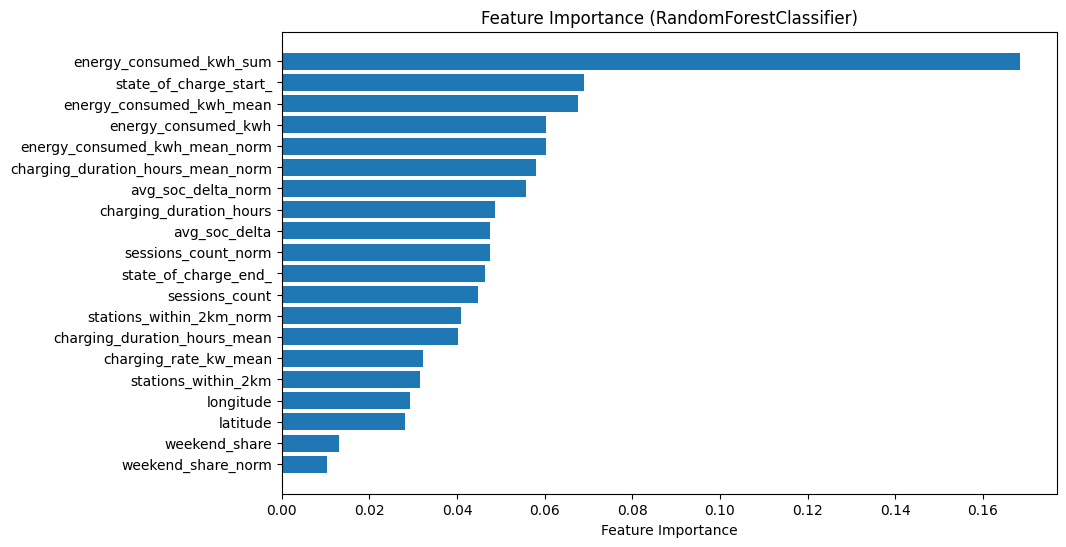

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from classifier (or regressor)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Feature Importance (RandomForestClassifier)")
plt.show()


In [ ]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_reg.fit(X_train, y_train_reg)

# Predict & evaluate
y_pred_xgb_reg = xgb_reg.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg)))
print("XGBoost R²:", r2_score(y_test_reg, y_pred_xgb_reg))


XGBoost RMSE: 0.03666739537524511
XGBoost R²: 0.7445719864990903


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels to integers
le = LabelEncoder()
y_train_class_enc = le.fit_transform(y_train_class)
y_test_class_enc = le.transform(y_test_class)

# Train XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.05, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train_class_enc)

# Predict & evaluate
y_pred_xgb_class_enc = xgb_clf.predict(X_test)
print("XGBoost Classification Accuracy:", accuracy_score(y_test_class_enc, y_pred_xgb_class_enc))
print("\nXGBoost Classification Report:\n", classification_report(y_test_class_enc, y_pred_xgb_class_enc, target_names=le.classes_))


c:\Users\Yash\OneDrive\Desktop\VS Code\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Accuracy: 0.5483870967741935

XGBoost Classification Report:
               precision    recall  f1-score   support

        High       0.55      0.75      0.63         8
         Low       0.64      0.70      0.67        10
      Medium       0.44      0.31      0.36        13

    accuracy                           0.55        31
   macro avg       0.54      0.59      0.55        31
weighted avg       0.53      0.55      0.53        31



In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_reg)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)))
print("Linear Regression R²:", r2_score(y_test_reg, y_pred_lin))

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_class)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_log))


Linear Regression RMSE: 3.1079688821942834e-16
Linear Regression R²: 1.0
Logistic Regression Accuracy: 0.9354838709677419


In [ ]:
import joblib

# Save models
joblib.dump(rf_reg, "rf_regressor.pkl")
joblib.dump(rf_clf, "rf_classifier.pkl")
joblib.dump(xgb_reg, "xgb_regressor.pkl")
joblib.dump(xgb_clf, "xgb_classifier.pkl")

print("Models saved successfully!")

# Load models
loaded_rf_reg = joblib.load("rf_regressor.pkl")
loaded_xgb_clf = joblib.load("xgb_classifier.pkl")

# Example usage of loaded model
sample_pred = loaded_xgb_clf.predict(X_test[:5])
print("Sample prediction from loaded XGBoost classifier:", sample_pred)


Models saved successfully!
Sample prediction from loaded XGBoost classifier: [1 0 1 2 1]


In [ ]:
import pandas as pd
import numpy as np

# Collect performance metrics
model_results = {
    "Model": ["RandomForest_Reg", "XGBoost_Reg", "LinearRegression"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_lin))
    ],
    "R²": [
        r2_score(y_test_reg, y_pred_reg),
        r2_score(y_test_reg, y_pred_xgb_reg),
        r2_score(y_test_reg, y_pred_lin)
    ]
}

# Convert to DataFrame
regression_results = pd.DataFrame(model_results)
print("\nRegression Model Comparison:\n", regression_results)

# Classification models
class_results = {
    "Model": ["RandomForest_Clf", "XGBoost_Clf", "LogisticRegression"],
    "Accuracy": [
        accuracy_score(y_test_class, y_pred_class),
        accuracy_score(y_test_class, le.inverse_transform(y_pred_xgb_class_enc)),
        accuracy_score(y_test_class, y_pred_log)
    ]
}

classification_results = pd.DataFrame(class_results)
print("\nClassification Model Comparison:\n", classification_results)



Regression Model Comparison:
               Model          RMSE        R²
0  RandomForest_Reg  3.792059e-02  0.726814
1       XGBoost_Reg  3.666740e-02  0.744572
2  LinearRegression  3.107969e-16  1.000000

Classification Model Comparison:
                 Model  Accuracy
0    RandomForest_Clf  0.548387
1         XGBoost_Clf  0.548387
2  LogisticRegression  0.935484


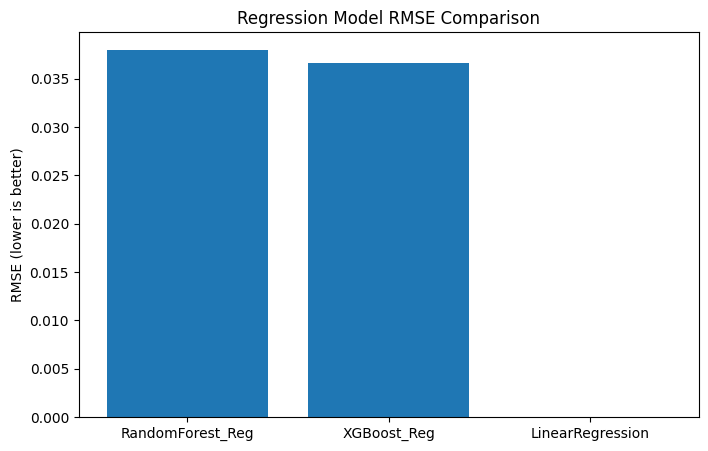

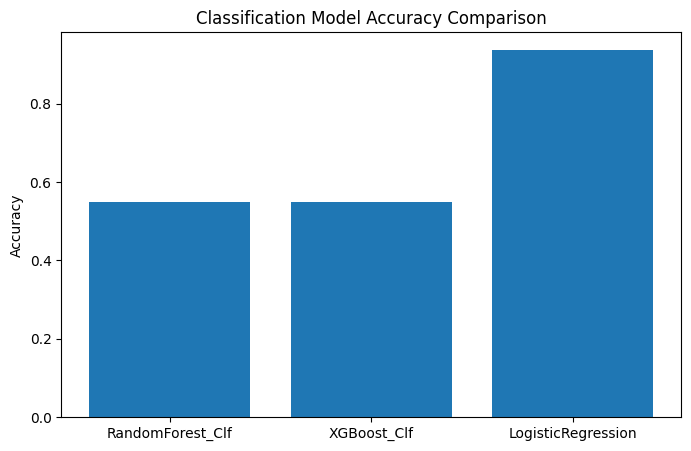

In [ ]:
import matplotlib.pyplot as plt

# Plot Regression RMSE
plt.figure(figsize=(8,5))
plt.bar(regression_results["Model"], regression_results["RMSE"])
plt.title("Regression Model RMSE Comparison")
plt.ylabel("RMSE (lower is better)")
plt.show()

# Plot Classification Accuracy
plt.figure(figsize=(8,5))
plt.bar(classification_results["Model"], classification_results["Accuracy"])
plt.title("Classification Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
regression_results.to_csv("regression_model_comparison.csv", index=False)
classification_results.to_csv("classification_model_comparison.csv", index=False)
print("Model comparison tables saved!")


Model comparison tables saved!
